# Diabetes Dataset Analysis

#### Dataset Description
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. Dataset was made accessible on Kaggle.com [See link](https://www.kaggle.com/code/brianhansen/diabetes-simple-analysis)

#### Content
The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables incleudes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

#### Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diab_df = pd.read_csv(r'C:\\Users\Xavier Simmons\Downloads\diabetes.csv')

In [3]:
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Checking the shape of the dataframe, data types of each column and if there are null values
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
correlation = diab_df.corr()

<Axes: >

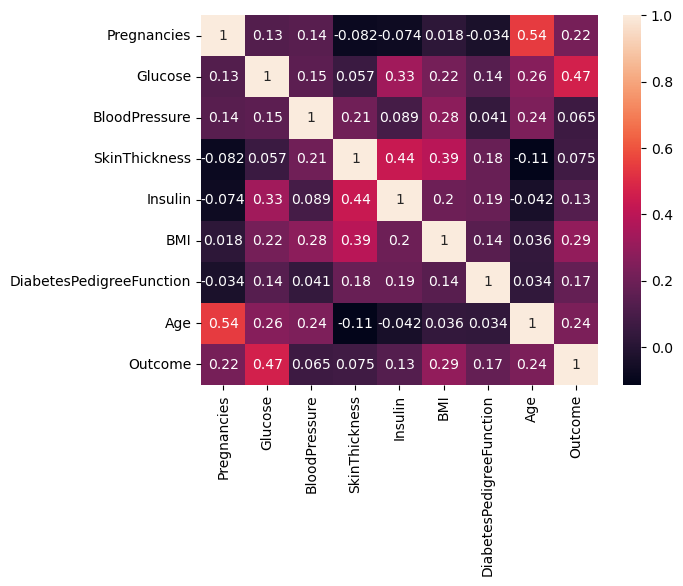

In [7]:
sns.heatmap(correlation, annot=True)

The highest correlation was between number of pregnancies and age for female patients with diabetes in this dataset (0.54 out of 1), with glucose and outcome being a close second (0.47 out of 1). According to [Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/gestational-diabetes/symptoms-causes/syc-20355339), women who have previously had gestational diabetes are at heightened risk of contracting Type 2 diabetes.

<Axes: xlabel='Glucose', ylabel='Count'>

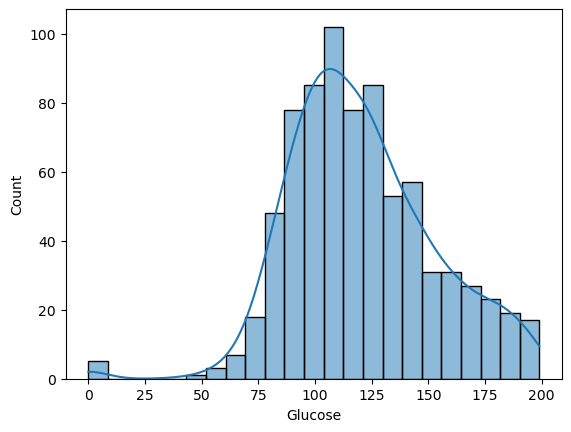

In [8]:
#Creating a visualization to show the distribution of glucose levels of patients across our dataset
sns.histplot(diab_df, x="Glucose", kde=True)

In [9]:
# There are patients with a glucose level of zero. Let's see how many there are.
patients_with_zero_glucose = diab_df[diab_df['Glucose'] == 0]
print(patients_with_zero_glucose)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1  


In the dataset, 5 patients have a blood glucose level of zero, while 2 of the 5 patients tested positive for diabetes. According to [Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/diabetic-hypoglycemia/symptoms-causes/syc-20371525), zero or near zero glucose/insulin levels are common in people diagnosed with Type 1 Diabetes. While it is possible that the two diabetic patients could be suffering from a severe case of diabetic hypoglycemia, that doesn't explain why the other 3 are showing a blood glucose level of 0.

In [10]:
#Checking to see if there are zeros in insulin levels as well
patients_with_zero_insulin = diab_df[diab_df['Insulin'] == 0]
print(patients_with_zero_insulin)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
5              5      116             74              0        0  25.6   
7             10      115              0              0        0  35.3   
..           ...      ...            ...            ...      ...   ...   
761            9      170             74             31        0  44.0   
762            9       89             62              0        0  22.5   
764            2      122             70             27        0  36.8   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Running into the same issue with insulin levels. Similar to glucose levels of zero, this is often found in people suffering from untreated Type 1 diabetes. According to an article found on [diabetesselfmanagement.com](https://www.diabetesselfmanagement.com/blog/do-you-know-your-insulin-level/), fasted insulin levels should never go below 3. 

<Axes: xlabel='BMI', ylabel='Count'>

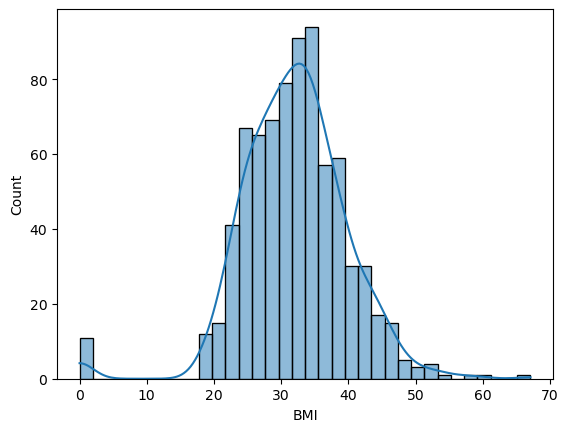

In [11]:
sns.histplot(diab_df, x="BMI", kde=True)

In [12]:
#Checking the number of patients with a BMI of zero
patients_with_BMI_zero = diab_df[diab_df['BMI'] == 0]
print(patients_with_BMI_zero)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
9              8      125             96              0        0  0.0   
49             7      105              0              0        0  0.0   
60             2       84              0              0        0  0.0   
81             2       74              0              0        0  0.0   
145            0      102             75             23        0  0.0   
371            0      118             64             23       89  0.0   
426            0       94              0              0        0  0.0   
494            3       80              0              0        0  0.0   
522            6      114              0              0        0  0.0   
684            5      136             82              0        0  0.0   
706           10      115              0              0        0  0.0   

     DiabetesPedigreeFunction  Age  Outcome  
9                       0.232   54        1  
49                      0.305  

In [13]:
#Checking for zeros in BloodPressure column
patients_with_zero_BP = diab_df[diab_df['BloodPressure'] == 0]
print(patients_with_zero_BP)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10      115              0              0        0  35.3   
15             7      100              0              0        0  30.0   
49             7      105              0              0        0   0.0   
60             2       84              0              0        0   0.0   
78             0      131              0              0        0  43.2   
81             2       74              0              0        0   0.0   
172            2       87              0             23        0  28.9   
193           11      135              0              0        0  52.3   
222            7      119              0              0        0  25.2   
261            3      141              0              0        0  30.0   
266            0      138              0              0        0  36.3   
269            2      146              0              0        0  27.5   
300            0      167             

It is safe to assume that zeros in the Glucose, BloodPressure, SkinThickness, Insulin and BMI columns should actually be NA values. We'll replace them so they reflect as such.

In [14]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diab_df[columns_to_replace] = diab_df[columns_to_replace].replace(0, np.nan)

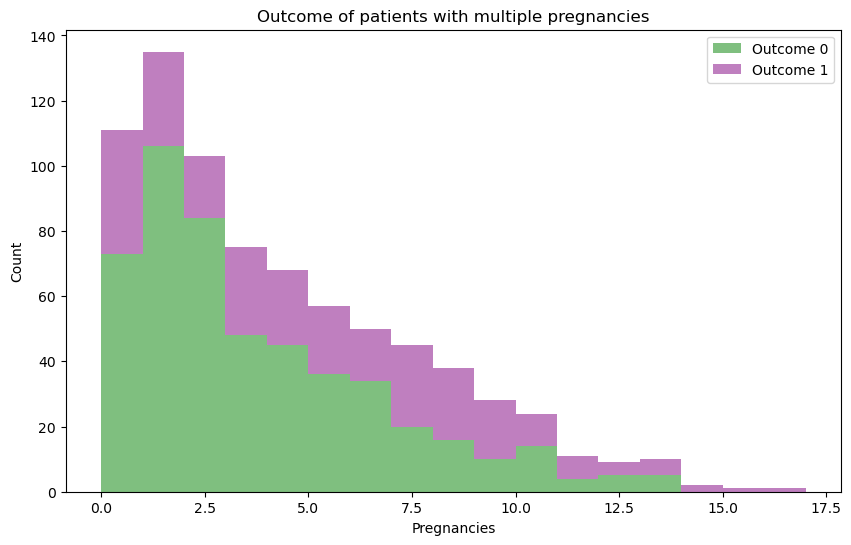

In [15]:
diab_df['Outcome'] = pd.Categorical(diab_df['Outcome'])

plt.figure(figsize=(10,6))
plt.hist([diab_df[diab_df['Outcome'] == 0]['Pregnancies'],
         diab_df[diab_df['Outcome'] == 1]['Pregnancies']],
        bins=range(0,18),
        alpha=0.5,
        stacked=True,
        color=['green','purple'],
        label=['Outcome 0', 'Outcome 1'])
plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.title('Outcome of patients with multiple pregnancies')
plt.legend()
plt.show()

Though not entirely definitive, it seems that the higher number of pregnancies the patient has, the higher the likelihood is of them either being or becoming diabetic.

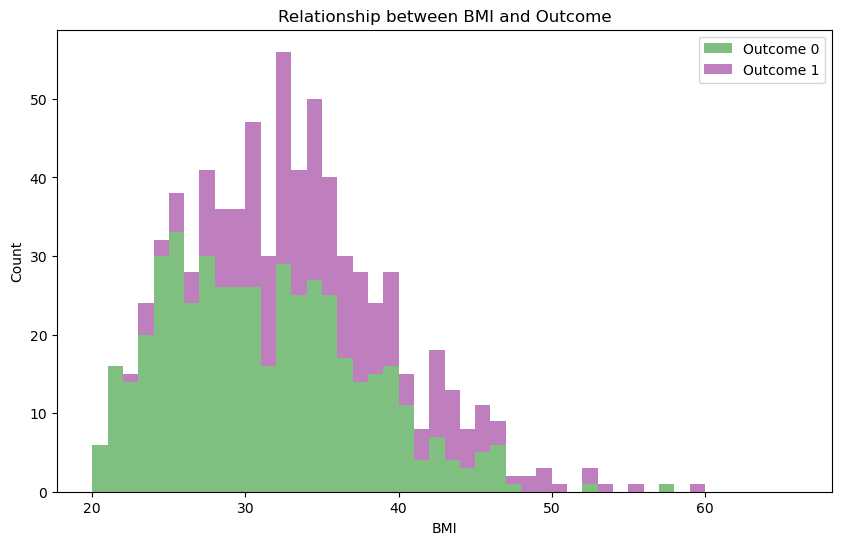

In [16]:
diab_df['Outcome'] = pd.Categorical(diab_df['Outcome'])

plt.figure(figsize=(10,6))
plt.hist([diab_df[diab_df['Outcome'] == 0]['BMI'],
         diab_df[diab_df['Outcome'] == 1]['BMI']],
        bins=range(20,67),
        alpha=0.5,
        stacked=True,
        color=['green','purple'],
        label=['Outcome 0', 'Outcome 1'])
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Relationship between BMI and Outcome')
plt.legend()
plt.show()

BMI is also a key risk factor which can effect the patient's outcome; higher BMI increases the chances of becoming diabetic

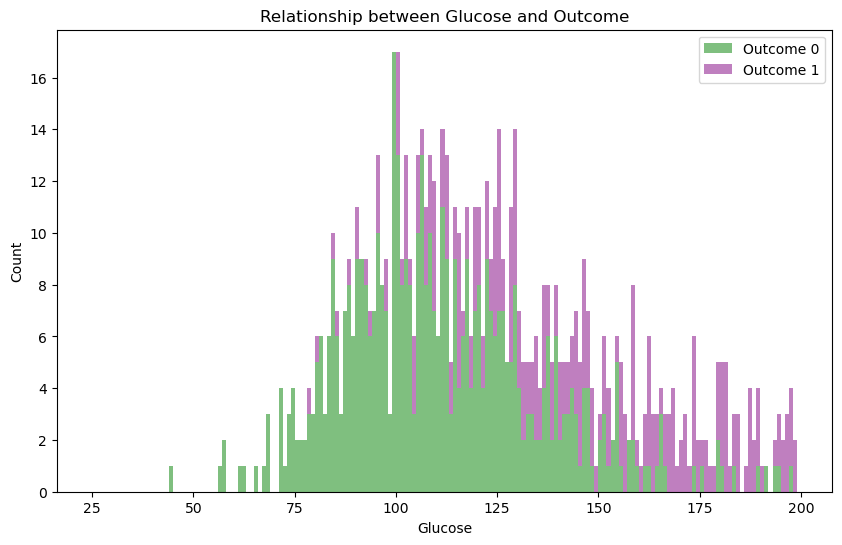

In [17]:
diab_df['Outcome'] = pd.Categorical(diab_df['Outcome'])

plt.figure(figsize=(10,6))
plt.hist([diab_df[diab_df['Outcome'] == 0]['Glucose'],
         diab_df[diab_df['Outcome'] == 1]['Glucose']],
        bins=range(25,200),
        alpha=0.5,
        stacked=True,
        color=['green','purple'],
        label=['Outcome 0', 'Outcome 1'])
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.title('Relationship between Glucose and Outcome')
plt.legend()
plt.show()

High glucose levels can also drastically increase the risk of becoming diabetic, as evidenced by the data.

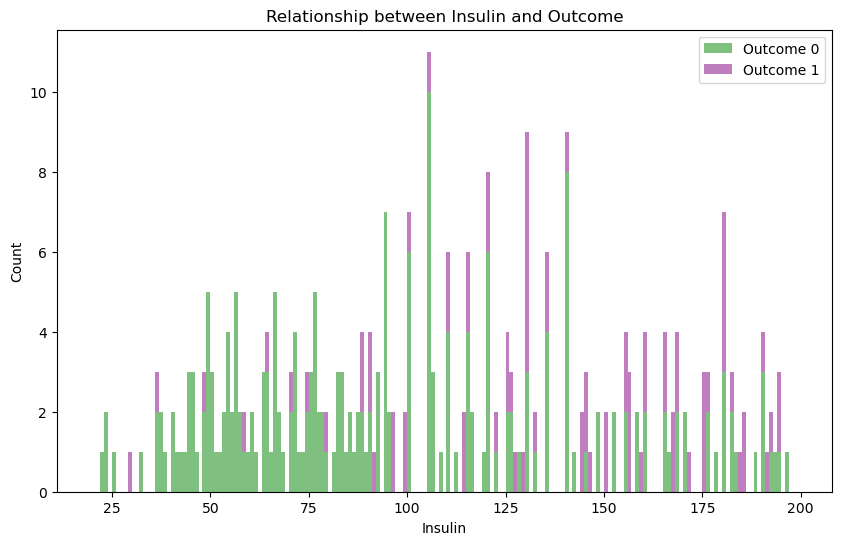

In [18]:
diab_df['Outcome'] = pd.Categorical(diab_df['Outcome'])

plt.figure(figsize=(10,6))
plt.hist([diab_df[diab_df['Outcome'] == 0]['Insulin'],
         diab_df[diab_df['Outcome'] == 1]['Insulin']],
        bins=range(20,200),
        alpha=0.5,
        stacked=True,
        color=['green','purple'],
        label=['Outcome 0', 'Outcome 1'])
plt.xlabel('Insulin')
plt.ylabel('Count')
plt.title('Relationship between Insulin and Outcome')
plt.legend()
plt.show()

Although there are different factors may effect one's insulin levels, according to [mymed.com](https://www.mymed.com/health-wellness/interesting-health-info/blood-sugar-levels/what-is-considered-a-normal-blood-sugar-level), fasted non-diabetic insulin levels between 70-99 mg/dl(3.9-6 mmol/L) are considered to be normal, with the goal for diabetic patients being between 80-130 mg/dl (4.5-7.2 mmol/L). Higher insulin levels are typically found in those who are diabetic.

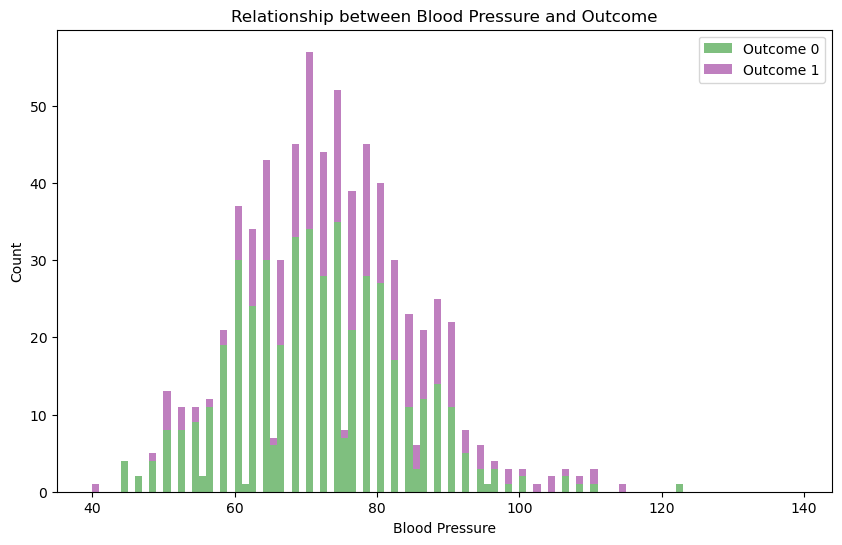

In [19]:
diab_df['Outcome'] = pd.Categorical(diab_df['Outcome'])

plt.figure(figsize=(10,6))
plt.hist([diab_df[diab_df['Outcome'] == 0]['BloodPressure'],
         diab_df[diab_df['Outcome'] == 1]['BloodPressure']],
        bins=range(40,140),
        alpha=0.5,
        stacked=True,
        color=['green','purple'],
        label=['Outcome 0', 'Outcome 1'])
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.title('Relationship between Blood Pressure and Outcome')
plt.legend()
plt.show()

Similar to the other risk factors previously mentioned, patients with a higher blood pressure readings are more likely to become or already are diabetic. As stated by the [CDC](https://www.cdc.gov/diabetes/library/features/diabetes-and-heart.html#:~:text=People%20with%20diabetes%20are%20also%20more%20likely%20to,thought%20to%20contribute%20to%20hardening%20of%20the%20arteries.), diabetes can exacerbate the risk of heart disease in a person, as high blood sugar can cause damage to blood vessels and the nerves that control the heart. In a sense, both conditions contribute to one another.  

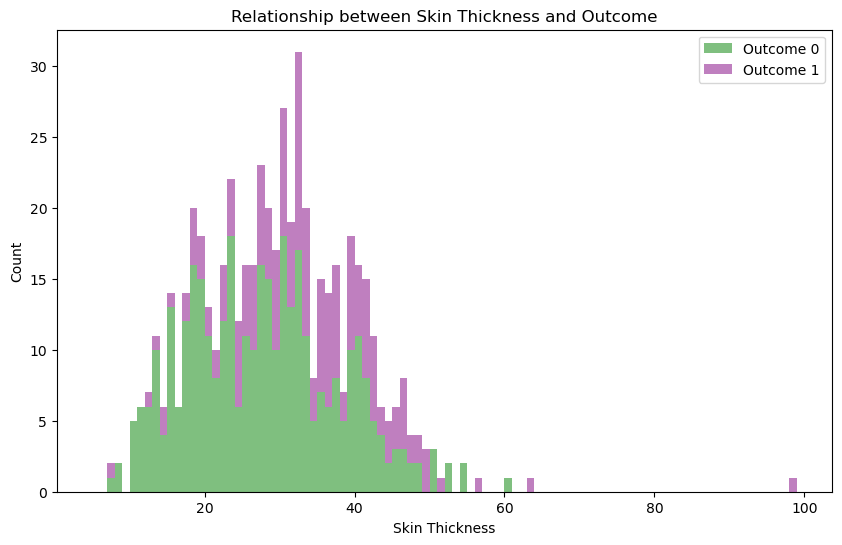

In [20]:
diab_df['Outcome'] = pd.Categorical(diab_df['Outcome'])

plt.figure(figsize=(10,6))
plt.hist([diab_df[diab_df['Outcome'] == 0]['SkinThickness'],
         diab_df[diab_df['Outcome'] == 1]['SkinThickness']],
        bins=range(5,100),
        alpha=0.5,
        stacked=True,
        color=['green','purple'],
        label=['Outcome 0', 'Outcome 1'])
plt.xlabel('Skin Thickness')
plt.ylabel('Count')
plt.title('Relationship between Skin Thickness and Outcome')
plt.legend()
plt.show()

Heightened skin thickeness is a commonly found in diabetic persons. According to the [American Academy of Dermatology](https://www.aad.org/public/diseases/a-z/diabetes-warning-signs), diabetes can have an effect on the appearance of one's skin. Of the 11 skin conditions listed, hard, thickening skin is found in those who have complications due to diabetes or diabetes that is difficult to treat.

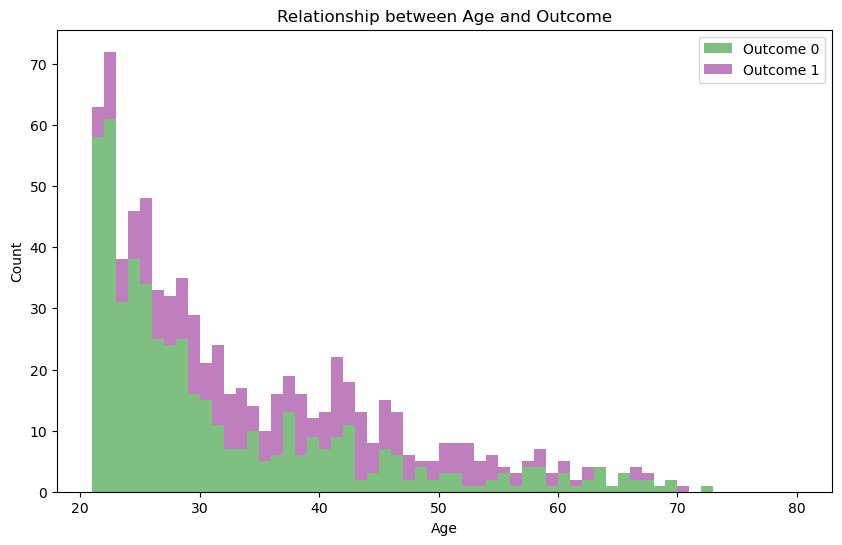

In [21]:
diab_df['Outcome'] = pd.Categorical(diab_df['Outcome'])

plt.figure(figsize=(10,6))
plt.hist([diab_df[diab_df['Outcome'] == 0]['Age'],
         diab_df[diab_df['Outcome'] == 1]['Age']],
        bins=range(21,81),
        alpha=0.5,
        stacked=True,
        color=['green','purple'],
        label=['Outcome 0', 'Outcome 1'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Relationship between Age and Outcome')
plt.legend()
plt.show()

Typically, patients who are diabetic don't live into older ages, given their condition is not well-managed. Older age does increase the risk of becoming diabetic.

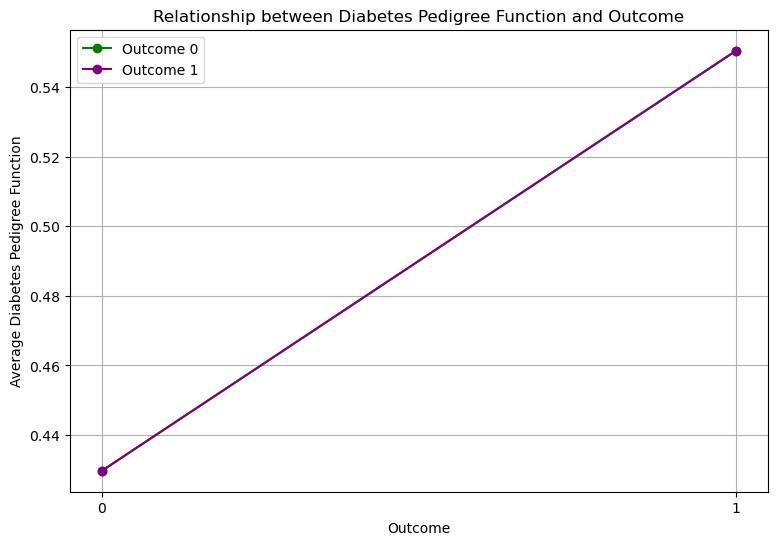

In [22]:
diab_df['Outcome'] = pd.Categorical(diab_df['Outcome'])

plt.figure(figsize=(9,6))
grouped_df=diab_df.groupby('Outcome')['DiabetesPedigreeFunction'].mean()
plt.plot(grouped_df.index, grouped_df.values, marker='o', color='green', label='Outcome 0')
plt.plot(grouped_df.index, grouped_df.values, marker='o', color='purple', label='Outcome 1')

plt.xlabel('Outcome')
plt.ylabel('Average Diabetes Pedigree Function')
plt.title('Relationship between Diabetes Pedigree Function and Outcome')
plt.legend()
plt.xticks(grouped_df.index)
plt.grid(True)

plt.show()

Diabetes Pedigree Function is a function that scores the likelihood of a patient inheriting diabetes. As evidenced in the dataset, the likelihood of becoming diabetic increases if there is any familial history of the disease. 

In [23]:
diab_df['Outcome'] = pd.to_numeric(diab_df['Outcome'], errors='coerce')

In [24]:
#Create an age bracket column to show percentage of diabetics per age group
age_range = range(20, diab_df['Age'].max() + 10, 10) 
diab_df['Age Bracket'] = pd.cut(diab_df['Age'], bins=list(age_range))

In [25]:
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age Bracket
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"


In [26]:
age = diab_df.groupby('Age Bracket')[['Outcome']].mean(numeric_only=True) * 100

<Figure size 1000x1200 with 0 Axes>

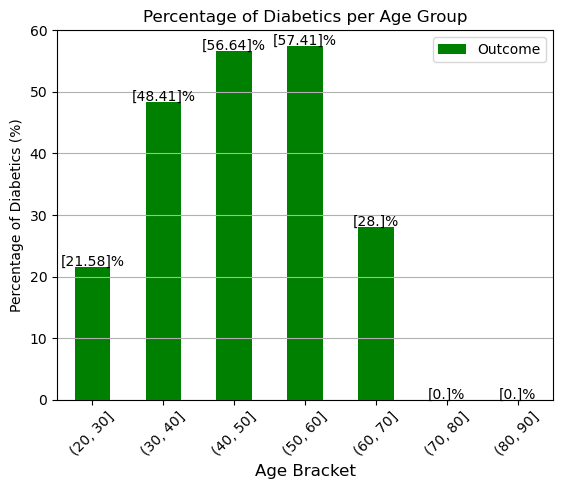

In [43]:
plt.figure(figsize=(10,12))

age.plot(kind='bar', color='green')

plt.xlabel('Age Bracket', fontsize=12)
plt.ylabel('Percentage of Diabetics (%)')
plt.title('Percentage of Diabetics per Age Group')
plt.xticks(rotation=45)
plt.ylim(0, 60)  
plt.grid(axis='y')

for i, v in enumerate(age.values):
    plt.text(i, v + 2, f'{v.round(2)}%', ha='center', va='top', fontsize=10, color='black')

plt.show()

Female patients in the 50-60 year age bracket represent largest percentage of diabetics for this dataset, at a rate of 57.41%.